<a href="https://colab.research.google.com/github/nelslindahlx/fractals/blob/main/MandelbrotFun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code generates a visualization of the Mandelbrot set within the specified ranges. It iterates over each point in a grid, calculates how quickly the values diverge (or if they stay within a certain limit), and then uses this information to color the point. The result is a beautiful, intricate fractal pattern.

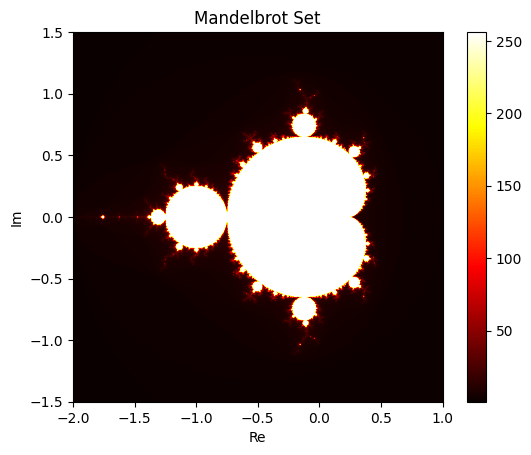

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    """Calculate the color of a Mandelbrot set point."""
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    """Generate a Mandelbrot set image."""
    xs = np.linspace(xmin, xmax, width)
    ys = np.linspace(ymin, ymax, height)
    image = np.empty((height, width))
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            image[j, i] = mandelbrot(complex(x, y), max_iter)
    return image

# Parameters for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5  # Complex plane boundaries
width, height = 800, 800  # Image size
max_iter = 256  # Maximum iterations per point

# Generate and display the Mandelbrot set
img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
plt.imshow(img, extent=[xmin, xmax, ymin, ymax], cmap='hot')
plt.colorbar()
plt.title("Mandelbrot Set")
plt.xlabel("Re")
plt.ylabel("Im")
plt.show()

This code creates a function plot_mandelbrot that can be reused with different parameters to zoom into different parts of the Mandelbrot set. You can adjust the xmin, xmax, ymin, and ymax parameters to focus on specific areas. Increasing max_iter will provide more detail at the cost of longer computation time. The color map can also be changed for different visual effects (e.g., 'plasma', 'inferno', 'magma').

To explore different parts of the fractal, simply modify the parameters in the plot_mandelbrot function calls. The second call, which is commented out, is an example of how to zoom into a specific area. You can uncomment it and adjust its parameters to explore other regions.

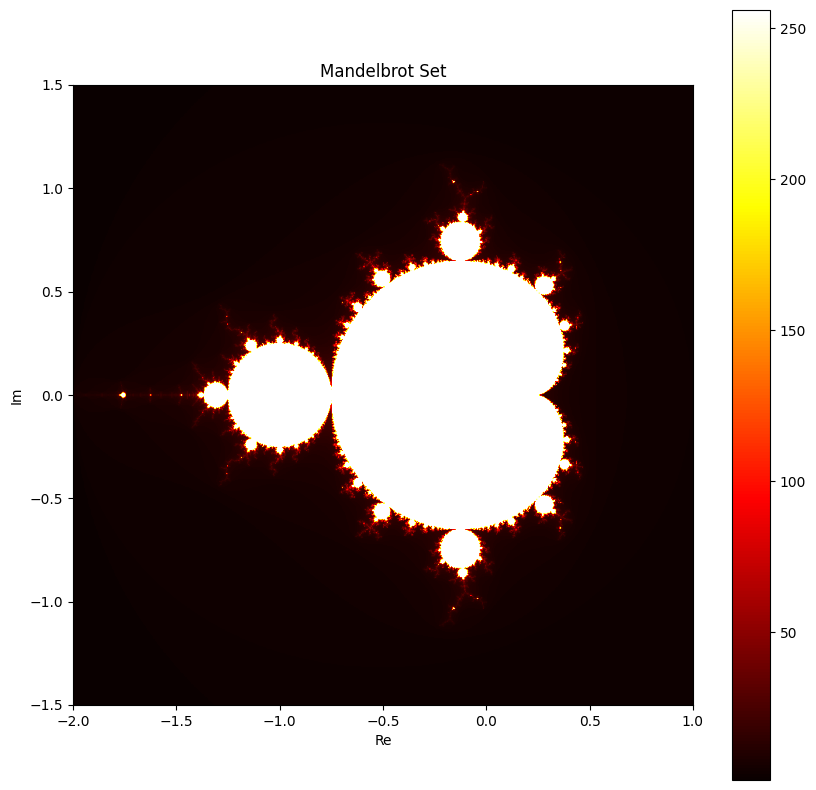

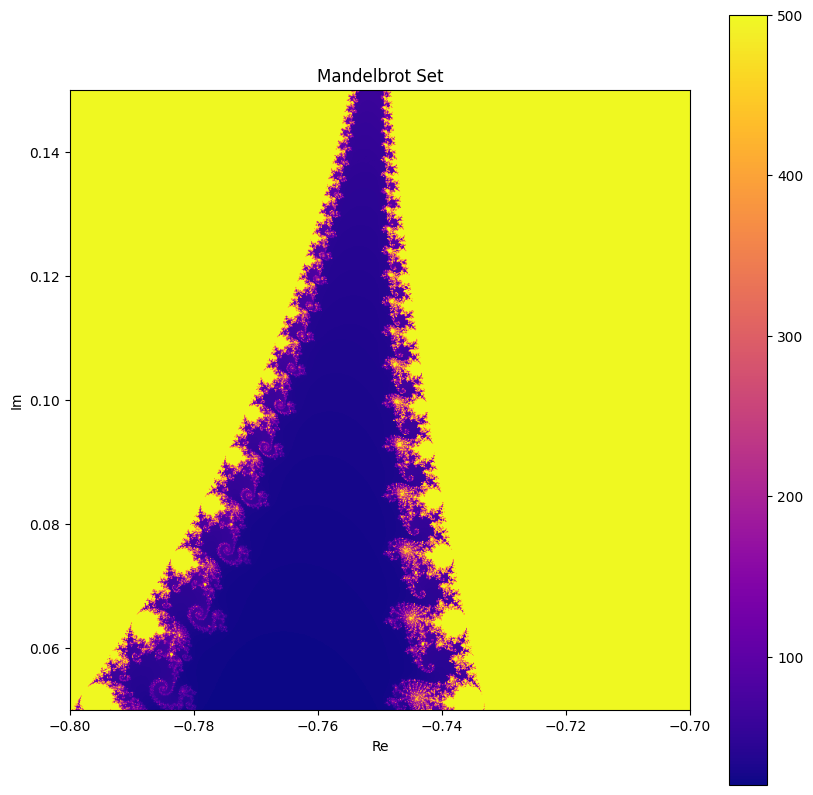

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    xs = np.linspace(xmin, xmax, width)
    ys = np.linspace(ymin, ymax, height)
    image = np.empty((height, width))
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            color = mandelbrot(complex(x, y), max_iter)
            image[j, i] = color
    return image

def plot_mandelbrot(xmin, xmax, ymin, ymax, width=800, height=800, max_iter=256, cmap='hot'):
    img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    plt.figure(figsize=(10, 10))
    plt.imshow(img, extent=[xmin, xmax, ymin, ymax], cmap=cmap)
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.show()

# Default view
plot_mandelbrot(-2.0, 1.0, -1.5, 1.5)

# Uncomment and modify parameters for zoomed views
plot_mandelbrot(-0.8, -0.7, 0.05, 0.15, max_iter=500, cmap='plasma')


You can experiment with different zoom levels and parameters to explore various parts of the Mandelbrot set. The high-resolution export feature is especially useful if you want to use the generated images for prints or detailed analysis.

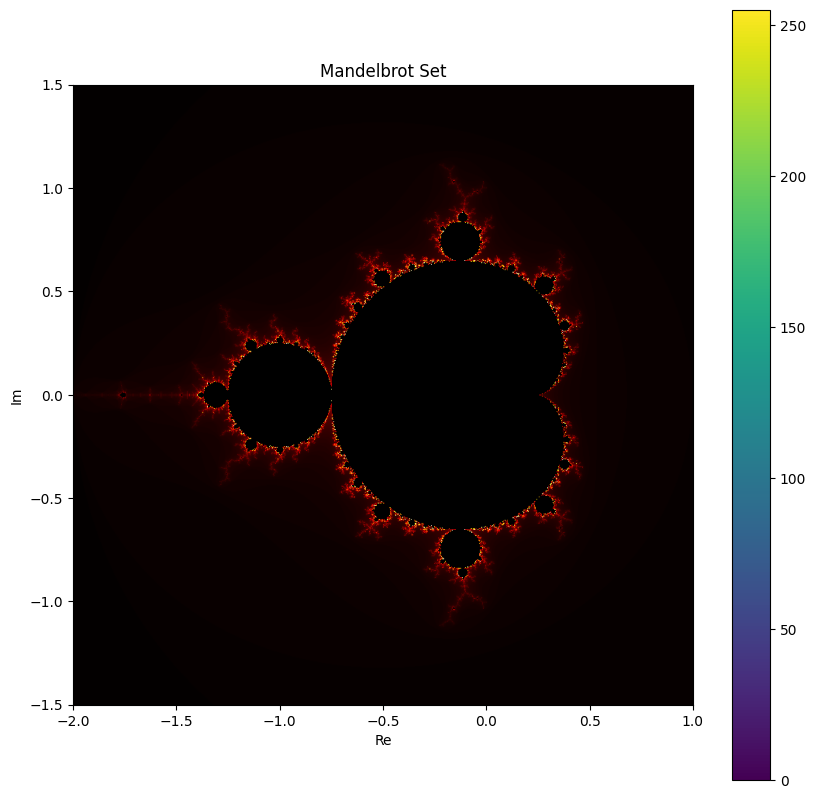

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    xs = np.linspace(xmin, xmax, width)
    ys = np.linspace(ymin, ymax, height)
    image = np.empty((height, width))
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            color = mandelbrot(complex(x, y), max_iter)
            image[j, i] = color
    return image

def custom_color_map(value, max_iter):
    """ Create a custom color based on iteration count. """
    if value == max_iter:
        return 0, 0, 0  # Black for points inside the set
    v = 768 * value / max_iter
    if v < 256:
        return v, 0, 0  # Red gradient
    elif v < 512:
        return 255, v - 256, 0  # Green gradient
    else:
        return 255, 255, v - 512  # Blue gradient

def plot_mandelbrot(xmin, xmax, ymin, ymax, width=800, height=800, cmap='hot', save_file=None):
    # Adaptive iteration count based on zoom level
    dx, dy = xmax - xmin, ymax - ymin
    max_iter = max(256, int(256 * max(2 / dx, 2 / dy)))

    img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

    # Apply custom color mapping
    colored_img = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            colored_img[i, j] = custom_color_map(img[i, j], max_iter)

    plt.figure(figsize=(10, 10))
    plt.imshow(colored_img, extent=[xmin, xmax, ymin, ymax])
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.xlabel("Re")
    plt.ylabel("Im")

    if save_file:
        plt.savefig(save_file, dpi=300)

    plt.show()

# Default view
plot_mandelbrot(-2.0, 1.0, -1.5, 1.5)

This version allows for a more detailed exploration of the Mandelbrot set, especially when zooming into regions of interest. The smooth coloring provides a more continuous and visually appealing gradient. The interactive zoom feature, while primarily functional in local environments, enhances the exploratory aspect of the fractal.

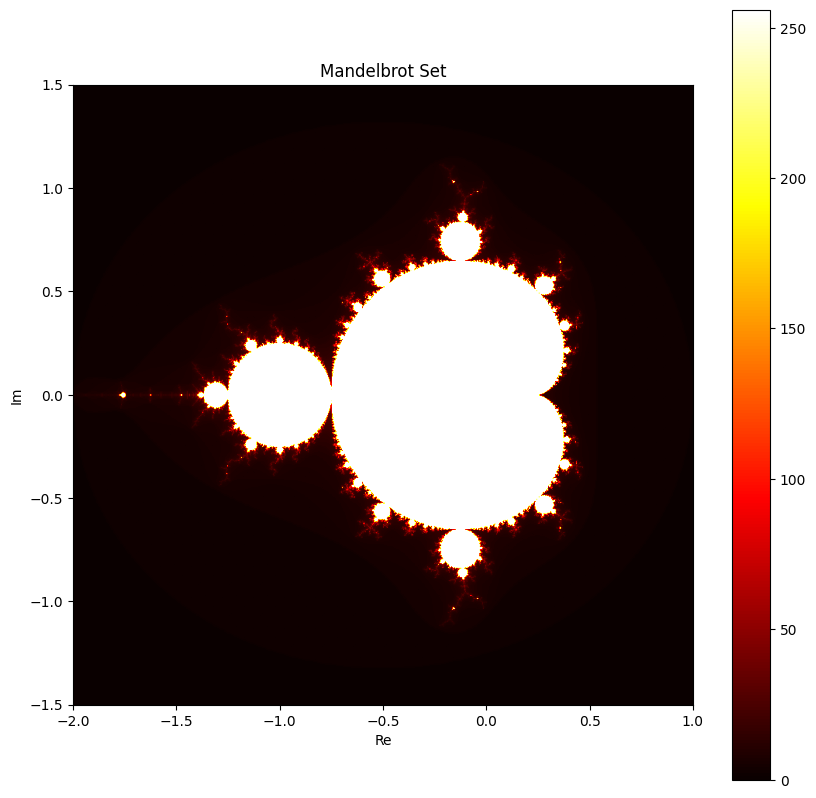

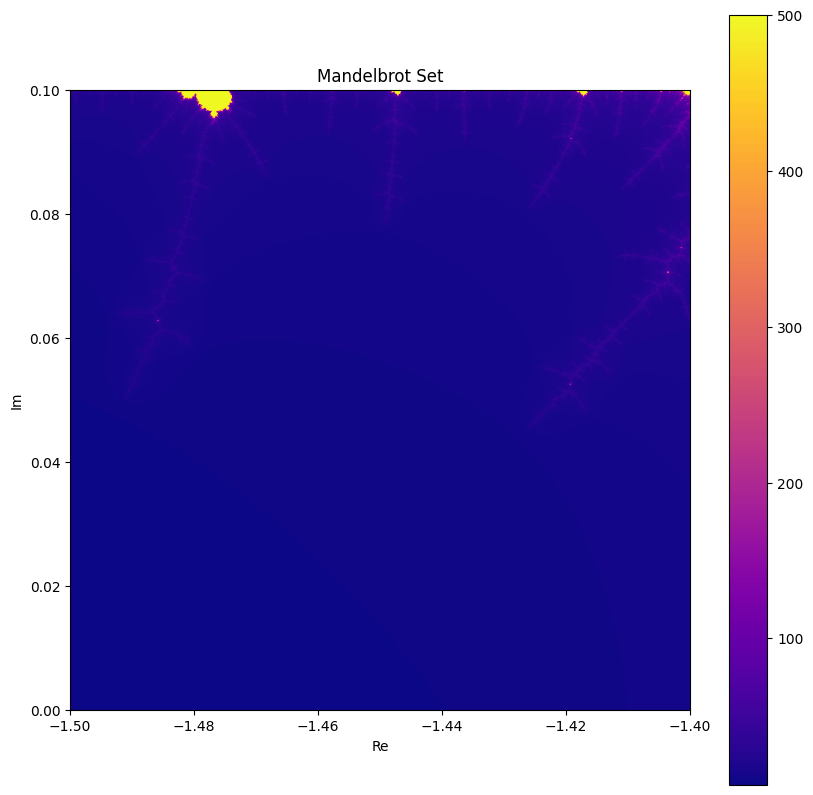

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width).reshape((1, width))
    y = np.linspace(ymin, ymax, height).reshape((height, 1))
    C = np.tile(x, (height, 1)) + 1j * np.tile(y, (1, width))

    Z = np.zeros_like(C)
    div_time = max_iter + np.zeros(C.shape, dtype=int)

    for i in range(max_iter):
        Z = Z**2 + C
        diverge = np.abs(Z) > 2
        div_now = diverge & (div_time == max_iter)
        div_time[div_now] = i
        Z[diverge] = 2

    return div_time

def plot_mandelbrot(xmin, xmax, ymin, ymax, width=800, height=800, max_iter=256, cmap='hot'):
    img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    plt.figure(figsize=(10, 10))
    plt.imshow(img, extent=[xmin, xmax, ymin, ymax], cmap=cmap)
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.show()

# Default view
plot_mandelbrot(-2.0, 1.0, -1.5, 1.5)

# Example of a zoomed-in view
plot_mandelbrot(-1.5, -1.4, 0.0, 0.1, max_iter=500, cmap='plasma')
